## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [12]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
MOMENTUM = 0.95
BATCH_SIZE = [2, 16, 32, 128, 256]

#BATCH_SIZE = [5000, 10000]

In [18]:
results = {}

for regulizer_ratio in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.1f" % (regulizer_ratio))

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=regulizer_ratio, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "BATCH_SIZE-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)   

50000/50000 [==============================] - 155s 3ms/step - loss: 2.2480 - acc: 0.1613 - val_loss: 2.6681 - val_acc: 0.1770
Epoch 50/50
50000/50000 [==============================] - 156s 3ms/step - loss: 2.2498 - acc: 0.1621 - val_loss: 2.6023 - val_acc: 0.1871
Experiment with BATCH_SIZE = 16.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)

50000/50000 [==============================] - 22s 431us/step - loss: 1.1295 - acc: 0.5990 - val_loss: 1.3644 - val_acc: 0.5301
Epoch 48/50
50000/50000 [==============================] - 21s 429us/step - loss: 1.1247 - acc: 0.5999 - val_loss: 1.3946 - val_acc: 0.5158
Epoch 49/50
50000/50000 [==============================] - 21s 430us/step - loss: 1.1257 - acc: 0.6000 - val_loss: 1.3646 - val_acc: 0.5222
Epoch 50/50
50000/50000 [==============================] - 22s 432us/step - loss: 1.1264 - acc: 0.6004 - val_loss: 1.3708 - val_acc: 0.5178
Experiment with BATCH_SIZE = 32.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 

50000/50000 [==============================] - 11s 220us/step - loss: 0.8205 - acc: 0.7070 - val_loss: 1.4946 - val_acc: 0.5218
Epoch 46/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.8153 - acc: 0.7087 - val_loss: 1.5812 - val_acc: 0.5132
Epoch 47/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.8033 - acc: 0.7126 - val_loss: 1.5800 - val_acc: 0.5069
Epoch 48/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.7960 - acc: 0.7158 - val_loss: 1.5605 - val_acc: 0.5061
Epoch 49/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7832 - acc: 0.7189 - val_loss: 1.7031 - val_acc: 0.4867
Epoch 50/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.7860 - acc: 0.7195 - val_loss: 1.5363 - val_acc: 0.5122
Experiment with BATCH_SIZE = 128.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input

50000/50000 [==============================] - 4s 83us/step - loss: 0.3216 - acc: 0.8894 - val_loss: 2.3471 - val_acc: 0.4602
Epoch 44/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.3244 - acc: 0.8892 - val_loss: 2.2879 - val_acc: 0.4516
Epoch 45/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.3101 - acc: 0.8932 - val_loss: 2.3391 - val_acc: 0.4713
Epoch 46/50
50000/50000 [==============================] - 4s 85us/step - loss: 0.2934 - acc: 0.8995 - val_loss: 2.3833 - val_acc: 0.4677
Epoch 47/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.2938 - acc: 0.8978 - val_loss: 2.4513 - val_acc: 0.4501
Epoch 48/50
50000/50000 [==============================] - 4s 82us/step - loss: 0.2936 - acc: 0.8994 - val_loss: 2.4250 - val_acc: 0.4605
Epoch 49/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.2768 - acc: 0.9062 - val_loss: 2.5297 - val_acc: 0.4427
Epoch 50/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 56us/step - loss: 0.2690 - acc: 0.9211 - val_loss: 2.1741 - val_acc: 0.4647
Epoch 42/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.2591 - acc: 0.9237 - val_loss: 2.2429 - val_acc: 0.4698
Epoch 43/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.2426 - acc: 0.9295 - val_loss: 2.4509 - val_acc: 0.4567 0
Epoch 44/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.2267 - acc: 0.9354 - val_loss: 2.2350 - val_acc: 0.4636
Epoch 45/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.2148 - acc: 0.9385 - val_loss: 2.2210 - val_acc: 0.4832
Epoch 46/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.2108 - acc: 0.9408 - val_loss: 2.3469 - val_acc: 0.4763
Epoch 47/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.1962 - acc: 0.9455 - val_loss: 2.5394 - val_acc: 0.4631
Epoch 48/50
50000/50000 [===================

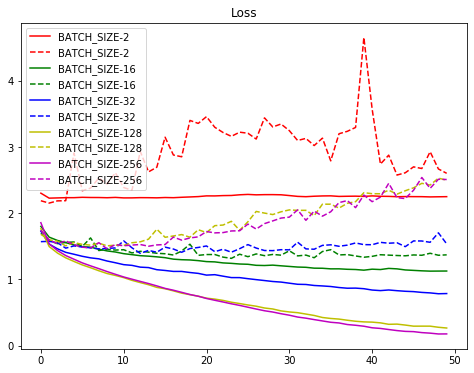

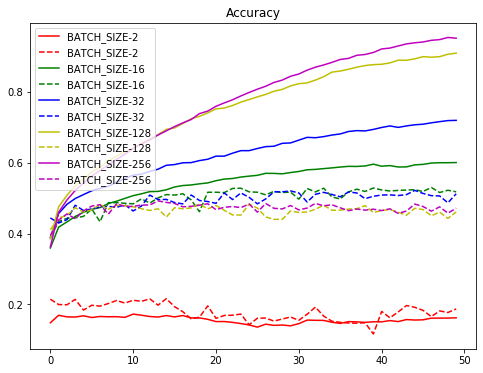

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):

    #plt.plot(range(len(train_loss)), train_loss, label="train loss")
    #plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])

plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    #plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    #plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])

plt.title("Accuracy")
plt.legend()
plt.show()



In [ ]:
# Batch size大小效果不好又慢

In [ ]:
#將 BN 放在 Input Layer 後，並比較結果，和Day083_BatchNorm比較

In [46]:
train, test = keras.datasets.cifar10.load_data()

In [47]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [48]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [49]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):

    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)    
    for i, n_units in enumerate(num_neurons):
          
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
          
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [50]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [51]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
______________________________________________________________

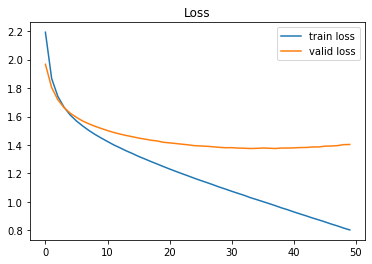

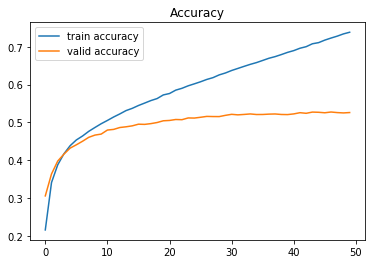

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
#將 BN 放在 Activation 之前，並比較訓練結果，和Day083_BatchNorm比較

In [53]:
train, test = keras.datasets.cifar10.load_data()

In [54]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [55]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [56]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)

    x = BatchNormalization()(x)    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [57]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [58]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,739,402
Trainable params: 1,739,146
Non-trainable params: 256
________________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.8561 - acc: 0.7101 - val_loss: 1.4341 - val_acc: 0.5199: 0s - loss: 0.8451 - a
Epoch 48/50
50000/50000 [==============================] - 2s 35us/step - loss: 0.8405 - acc: 0.7176 - val_loss: 1.4379 - val_acc: 0.5173s - loss: 0.8296 - ac - ETA: 0s - loss: 0.8357 - acc: 0
Epoch 49/50
50000/50000 [==============================] - 2s 35us/step - loss: 0.8262 - acc: 0.7206 - val_loss: 1.4658 - val_acc: 0.5059
Epoch 50/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.8124 - acc: 0.7254 - val_loss: 1.4953 - val_acc: 0.4999.8116 - acc: 0.72


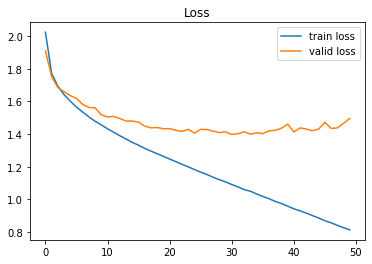

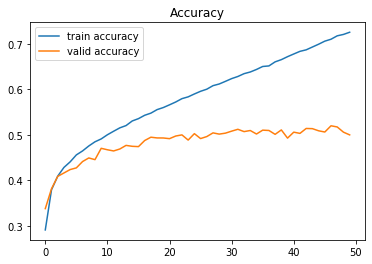

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()